In [38]:
!pip install scikit-plot
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip uninstall -v scikit-learn
!pip install -v scikit-learn==1.2.2

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done
Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.3.2.dist-info/COPYING
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.3.2.dist-info/INSTALLER
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.3.2.dist-info/METADATA
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.3.2.dist-info/RECORD
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.3.2.dist-info/REQUESTED
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.3.2.dist-info/WHEEL
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.3.2.dist-info/top_level.txt
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/__check_build/__init__.py
    /usr/local/lib/python3.10/dist

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Step 1: Load the dataset
data = pd.read_csv('/content/dataset.csv')
data.head()

verifiedby    country  class  \
0        La Silla Vacía   Colombia  FALSE   
1            Newtral.es      Spain  FALSE   
2         FactCrescendo      India  False   
3   France 24 Observers     France  False   
4          Agência Lupa     Brazil  False   

                                               title published_date  \
0   The coronavirus is an amplified bacteria rela...    2020/06/17    
1   A law allows people to go for a run during th...    2020/04/09    
2   Chinese converting to Islam after realizing t...    2020/02/20    
3   Bat market and bat meat are being sold in Wuhan.    2020/01/27    
4   You can self-diagnose COVID-19 by holding you...    2020/03/16    

    country1 country2 country3 country4  \
0   Colombia      NaN      NaN      NaN   
1      Spain      NaN      NaN      NaN   
2      India      NaN      NaN      NaN   
3     France      NaN      NaN      NaN   
4     Brazil      NaN      NaN      NaN   

                                      article_source ref_source  \
0  https://lasillavacia.com/detector-video-falso-...    poynter   
1  https://www.newtral.es/la-broma-de-que-a-los-r...    poynter   
2  https://english.factcrescendo.com/2020/02/20/c...    poynter   
3  https://observers.france24.com/fr/20200130-int...    poynter   
4  https://piaui.folha.uol.com.br/lupa/2020/03/16...    poynter   

                                        source_title  \
0  Detector a video falso que dice que el Covid e...   
1  La broma de que a los “runners” se les permite...   
2  Are Chinese people converting to Islam in fear...   
3  La soupe à la chauve-souris, un plat prisé en ...   
4  #Verificamos: É falso que quem consegue prende...   

                                        content_text category lang  
0  La Silla Vacía usa Cookies para mejorar la exp...      NaN   es  
1  En los últimos días nos ha llegado una consult...      NaN   es  
2  The fact behind every news!, Ever since the Wo...      NaN   en  
3  عربي, English, Français, Contribuer, فارسی, عر...      NaN   fr  
4  , “O novo CORONA VÍRUS pode não mostrar sinais...      NaN   pt

**EDA**

Analysis of Dataset

here we will do some analysis on loaded dataset, so that we can understand dataset well like what type of data is there, type of the data, missing values, corelation between all the variables etc.

In [3]:
from pandas_profiling import ProfileReport

<ipython-input-3-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [4]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
profile = ProfileReport(data,title="Dataset Report",html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
# Summary statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
       verifiedby country  class  \
count        6902    6730   6900   
unique         91     388     51   
top           AFP   India  False   
freq          694    1178   2877   

                                                    title published_date  \
count                                                6902           6902   
unique                                               6719            241   
top     Does Trump Own Stock in a Company CDC Uses for...    2020/03/17    
freq                                                    4            143   

       country1       country2        country3 country4  \
count      6730            559             101       29   
unique      106             92              46       22   
top       India   North Africa   United States    Spain   
freq       1185            137               9        3   

                                           article_source ref_source  \
count                                             

In [6]:
# Convert the "class" column to uppercase
data['class'] = data['class'].str.upper()

In [7]:
# Check for missing values
data.isnull().sum()

verifiedby           0
country            172
class                2
title                0
published_date       0
country1           172
country2          6343
country3          6801
country4          6873
article_source       7
ref_source           0
source_title       454
content_text       775
category          6730
lang               342
dtype: int64

In [8]:
data.head()

verifiedby    country  class  \
0        La Silla Vacía   Colombia  FALSE   
1            Newtral.es      Spain  FALSE   
2         FactCrescendo      India  FALSE   
3   France 24 Observers     France  FALSE   
4          Agência Lupa     Brazil  FALSE   

                                               title published_date  \
0   The coronavirus is an amplified bacteria rela...    2020/06/17    
1   A law allows people to go for a run during th...    2020/04/09    
2   Chinese converting to Islam after realizing t...    2020/02/20    
3   Bat market and bat meat are being sold in Wuhan.    2020/01/27    
4   You can self-diagnose COVID-19 by holding you...    2020/03/16    

    country1 country2 country3 country4  \
0   Colombia      NaN      NaN      NaN   
1      Spain      NaN      NaN      NaN   
2      India      NaN      NaN      NaN   
3     France      NaN      NaN      NaN   
4     Brazil      NaN      NaN      NaN   

                                      article_source ref_source  \
0  https://lasillavacia.com/detector-video-falso-...    poynter   
1  https://www.newtral.es/la-broma-de-que-a-los-r...    poynter   
2  https://english.factcrescendo.com/2020/02/20/c...    poynter   
3  https://observers.france24.com/fr/20200130-int...    poynter   
4  https://piaui.folha.uol.com.br/lupa/2020/03/16...    poynter   

                                        source_title  \
0  Detector a video falso que dice que el Covid e...   
1  La broma de que a los “runners” se les permite...   
2  Are Chinese people converting to Islam in fear...   
3  La soupe à la chauve-souris, un plat prisé en ...   
4  #Verificamos: É falso que quem consegue prende...   

                                        content_text category lang  
0  La Silla Vacía usa Cookies para mejorar la exp...      NaN   es  
1  En los últimos días nos ha llegado una consult...      NaN   es  
2  The fact behind every news!, Ever since the Wo...      NaN   en  
3  عربي, English, Français, Contribuer, فارسی, عر...      NaN   fr  
4  , “O novo CORONA VÍRUS pode não mostrar sinais...      NaN   pt

In [9]:
# Step 1: Data Preprocessing
# Convert 'class' column to binary labels
data['class'] = data['class'].map({'TRUE': 1, 'FALSE': 0})

# Filter out rows with 'class' values other than 0 and 1
data = data[(data['class'] == 0) | (data['class'] == 1)]

In [10]:
data.head()

verifiedby    country  class  \
0        La Silla Vacía   Colombia    0.0   
1            Newtral.es      Spain    0.0   
2         FactCrescendo      India    0.0   
3   France 24 Observers     France    0.0   
4          Agência Lupa     Brazil    0.0   

                                               title published_date  \
0   The coronavirus is an amplified bacteria rela...    2020/06/17    
1   A law allows people to go for a run during th...    2020/04/09    
2   Chinese converting to Islam after realizing t...    2020/02/20    
3   Bat market and bat meat are being sold in Wuhan.    2020/01/27    
4   You can self-diagnose COVID-19 by holding you...    2020/03/16    

    country1 country2 country3 country4  \
0   Colombia      NaN      NaN      NaN   
1      Spain      NaN      NaN      NaN   
2      India      NaN      NaN      NaN   
3     France      NaN      NaN      NaN   
4     Brazil      NaN      NaN      NaN   

                                      article_source ref_source  \
0  https://lasillavacia.com/detector-video-falso-...    poynter   
1  https://www.newtral.es/la-broma-de-que-a-los-r...    poynter   
2  https://english.factcrescendo.com/2020/02/20/c...    poynter   
3  https://observers.france24.com/fr/20200130-int...    poynter   
4  https://piaui.folha.uol.com.br/lupa/2020/03/16...    poynter   

                                        source_title  \
0  Detector a video falso que dice que el Covid e...   
1  La broma de que a los “runners” se les permite...   
2  Are Chinese people converting to Islam in fear...   
3  La soupe à la chauve-souris, un plat prisé en ...   
4  #Verificamos: É falso que quem consegue prende...   

                                        content_text category lang  
0  La Silla Vacía usa Cookies para mejorar la exp...      NaN   es  
1  En los últimos días nos ha llegado una consult...      NaN   es  
2  The fact behind every news!, Ever since the Wo...      NaN   en  
3  عربي, English, Français, Contribuer, فارسی, عر...      NaN   fr  
4  , “O novo CORONA VÍRUS pode não mostrar sinais...      NaN   pt

In [11]:
#above class columns looks in float so converted into int
data['class'] = data['class'].astype(int)
data.head()

<ipython-input-11-85cfaba5e5c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'] = data['class'].astype(int)


verifiedby    country  class  \
0        La Silla Vacía   Colombia      0   
1            Newtral.es      Spain      0   
2         FactCrescendo      India      0   
3   France 24 Observers     France      0   
4          Agência Lupa     Brazil      0   

                                               title published_date  \
0   The coronavirus is an amplified bacteria rela...    2020/06/17    
1   A law allows people to go for a run during th...    2020/04/09    
2   Chinese converting to Islam after realizing t...    2020/02/20    
3   Bat market and bat meat are being sold in Wuhan.    2020/01/27    
4   You can self-diagnose COVID-19 by holding you...    2020/03/16    

    country1 country2 country3 country4  \
0   Colombia      NaN      NaN      NaN   
1      Spain      NaN      NaN      NaN   
2      India      NaN      NaN      NaN   
3     France      NaN      NaN      NaN   
4     Brazil      NaN      NaN      NaN   

                                      article_source ref_source  \
0  https://lasillavacia.com/detector-video-falso-...    poynter   
1  https://www.newtral.es/la-broma-de-que-a-los-r...    poynter   
2  https://english.factcrescendo.com/2020/02/20/c...    poynter   
3  https://observers.france24.com/fr/20200130-int...    poynter   
4  https://piaui.folha.uol.com.br/lupa/2020/03/16...    poynter   

                                        source_title  \
0  Detector a video falso que dice que el Covid e...   
1  La broma de que a los “runners” se les permite...   
2  Are Chinese people converting to Islam in fear...   
3  La soupe à la chauve-souris, un plat prisé en ...   
4  #Verificamos: É falso que quem consegue prende...   

                                        content_text category lang  
0  La Silla Vacía usa Cookies para mejorar la exp...      NaN   es  
1  En los últimos días nos ha llegado una consult...      NaN   es  
2  The fact behind every news!, Ever since the Wo...      NaN   en  
3  عربي, English, Français, Contribuer, فارسی, عر...      NaN   fr  
4  , “O novo CORONA VÍRUS pode não mostrar sinais...      NaN   pt

In [12]:
# Check for missing values
data.isnull().sum()

verifiedby           0
country            133
class                0
title                0
published_date       0
country1           133
country2          5268
country3          5641
country4          5705
article_source       4
ref_source           0
source_title       352
content_text       613
category          5598
lang               280
dtype: int64

In [13]:
# Step 2: Text Data Preprocessing
# Remove irrelevant columns
data = data[['class', 'title', 'content_text']]
# Combine 'title' and 'content_text' into a single text feature
data['text'] = data['title'] + ' ' + data['content_text']

<ipython-input-13-80980135e01c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['title'] + ' ' + data['content_text']


In [14]:
# Remove rows with missing 'text' values
data = data.dropna(subset=['text'])

In [15]:
# Check for missing values in the 'class' column
missing_values = data['class'].isnull().sum()
if missing_values > 0:
    data.dropna(subset=['class'], inplace=True)
    print(f'Dropped {missing_values} rows with missing "class" labels.')

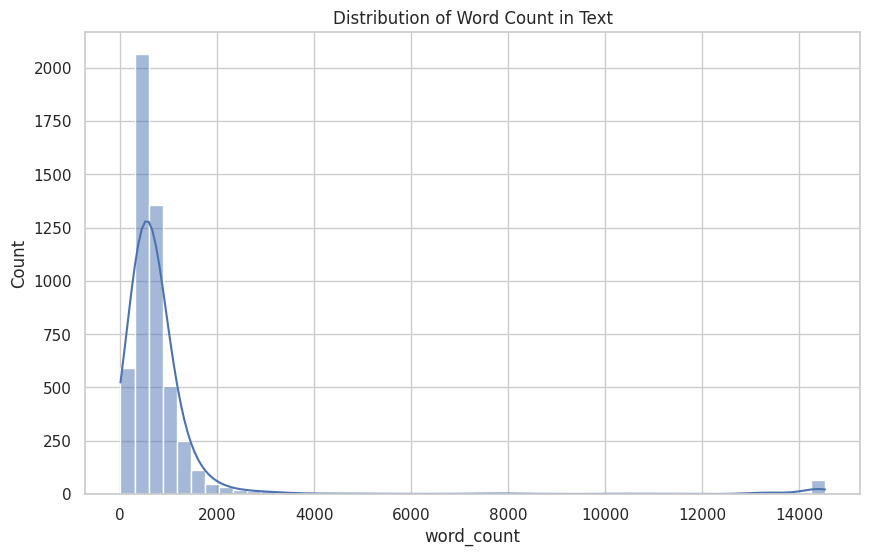

In [20]:
# Word count distribution in the 'text' column
data['word_count'] = data['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='word_count', bins=50, kde=True)
plt.title('Distribution of Word Count in Text')
plt.show()

In [19]:
# Tokenization and TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf_vectorizer.fit_transform(data['text'].values.astype('U'))
y = data['class']

In [21]:
y.value_counts() #impanaced data

0    5084
1      34
Name: class, dtype: int64

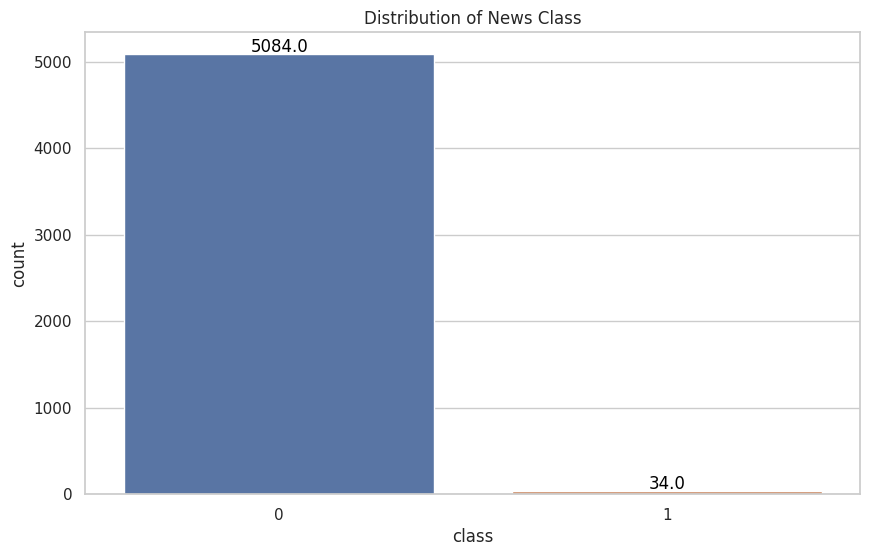

In [17]:
# Data distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='class', data=data)
# Annotate the bars with count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Distribution of News Class')
plt.show()

Here in above chart we can clearly see that its imbalanced dataset so what ever model we will build it will be bias

so to resolve this problem we need to balance it using SMOT method


In [24]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# Create a SMOTE object
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Use fit_resample to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after resampling
print(Counter(y_resampled))

Counter({0: 5084, 1: 5084})


Now, we can see it is balanced

In [25]:
# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [27]:
# Step 4: Model Selection - GridSearchCV with multiple algorithms
# Define models and their hyperparameter grids
models = {
    'Multinomial Naive Bayes': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 0.5, 1.0],
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 300],
        }
    },
    'Support Vector Classifier': {
        'model': SVC(),
        'params': {
            'C': [1, 10, 100],
            'kernel': ['linear', 'rbf'],
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'max_iter': [100, 200, 300],
        }
    }
}

best_models = {}
for model_name, model_info in models.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

In [32]:
# Step 5: Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score  # Add this import

best_model = None
best_accuracy = 0
best_f1 = 0  # Change variable name from f1_score to best_f1

for model_name, best_model in best_models.items():
    y_pred = best_model.predict(X_test)

    # Accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Calculate the F1-score
    f1 = f1_score(y_test, y_pred)  # Change variable name from f1_score to f1

    print(f'Model: {model_name}')
    print(f'Best Parameters: {best_models[model_name]}')
    print(f'Accuracy: {accuracy}')
    print(f'F1-Score: {f1}')  # Change variable name from f1_score to f1
    print(report)
    print('\n')

    # Check if this model has the best accuracy and F1-score so far
    if accuracy > best_accuracy and f1 > best_f1:  # Change variable name from f1_score to f1
        best_accuracy = accuracy
        best_f1 = f1  # Change variable name from f1_score to best_f1
        best_model = best_models[model_name]

# Print the best model based on accuracy and F1-score
print(f'Best Model based on Accuracy: {best_model} (Accuracy: {best_accuracy}, F1-Score: {best_f1})')  # Change variable name from f1_score to best_f1


Model: Multinomial Naive Bayes
Best Parameters: MultinomialNB(alpha=0.1)
Accuracy: 0.9867256637168141
F1-Score: 0.9865871833084947
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1041
           1       0.97      1.00      0.99       993

    accuracy                           0.99      2034
   macro avg       0.99      0.99      0.99      2034
weighted avg       0.99      0.99      0.99      2034



Model: Random Forest
Best Parameters: RandomForestClassifier(n_estimators=200)
Accuracy: 0.9990167158308751
F1-Score: 0.9989939637826961
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       1.00      1.00      1.00       993

    accuracy                           1.00      2034
   macro avg       1.00      1.00      1.00      2034
weighted avg       1.00      1.00      1.00      2034



Model: Support Vector Classifier
Best Parameters: SVC(C=10, kernel='linear